<a href="https://colab.research.google.com/github/Shiva9959/DEVTERN_INTERNSHIP/blob/main/Shiva_Devtern_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
# Load the dataset
df = pd.read_csv('/content/uber-raw-data-sep14.csv')

In [ ]:
# Convert Date/Time to datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [ ]:
# Create new columns for analysis
df['hour'] = df['Date/Time'].dt.hour
df['day'] = df['Date/Time'].dt.day
df['day_of_week'] = df['Date/Time'].dt.dayofweek
df['month'] = df['Date/Time'].dt.month

In [ ]:
# Basic data exploration
print(df.describe())
print(df.info())

                           Date/Time            Lat            Lon  \
count                         114425  114425.000000  114424.000000   
mean   2014-09-08 22:18:11.367620864      40.740388     -73.972792   
min              2014-09-01 00:00:00      40.000000     -74.677200   
25%              2014-09-04 16:42:00      40.721900     -73.997425   
50%              2014-09-07 00:23:00      40.743300     -73.983700   
75%              2014-09-10 10:12:00      40.761800     -73.965400   
max              2014-09-30 22:59:00      41.224600     -72.905700   
std                              NaN       0.040793       0.063868   

                hour            day    day_of_week     month  
count  114425.000000  114425.000000  114425.000000  114425.0  
mean       14.223981       8.316233       2.689596       9.0  
min         0.000000       1.000000       0.000000       9.0  
25%        10.000000       4.000000       1.000000       9.0  
50%        15.000000       7.000000       2.000000    

<ipython-input-7-c738392295ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='viridis')


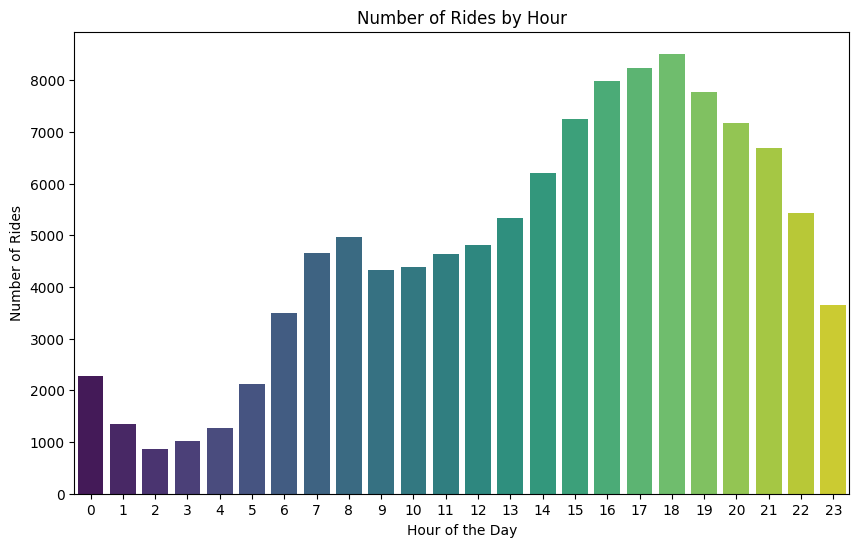

In [ ]:
# Visualize the distribution of rides by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, palette='viridis')
plt.title('Number of Rides by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

<ipython-input-8-9fa64d5c0a33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, palette='viridis')


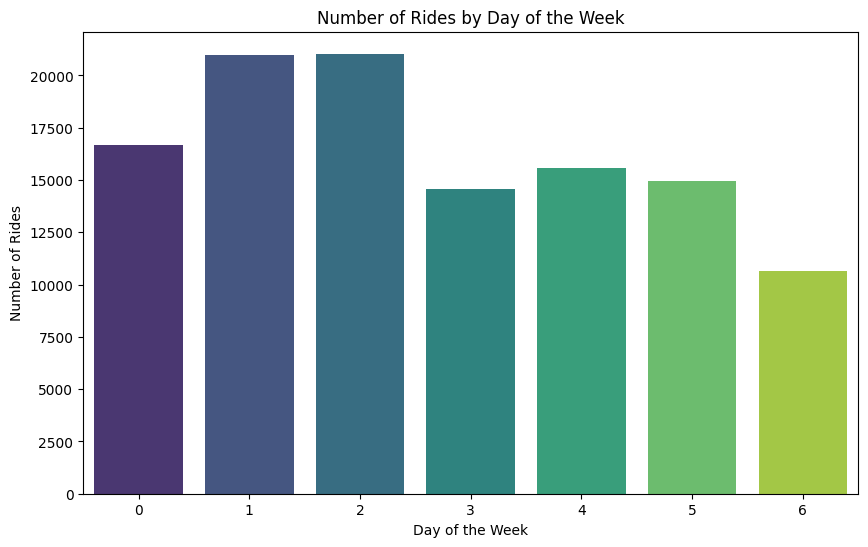

In [ ]:
# Visualize the distribution of rides by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, palette='viridis')
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.show()

<ipython-input-9-dd6de5bef1a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='month', data=df, palette='viridis')


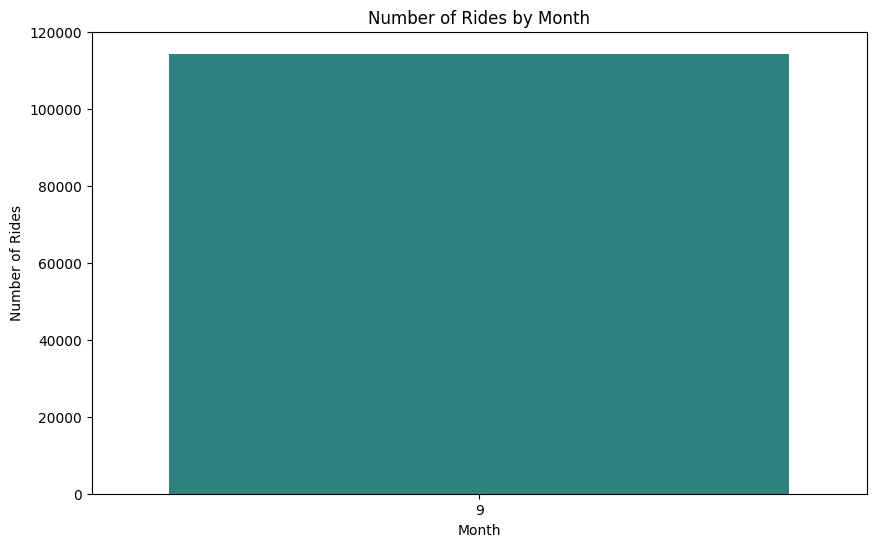

In [ ]:
# Visualize the distribution of rides by month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

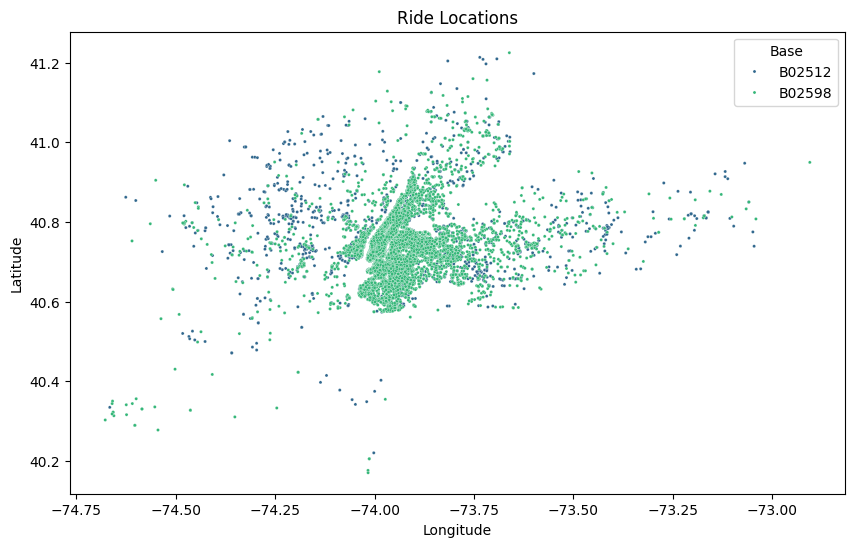

In [ ]:
# Scatter plot of ride locations
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lon', y='Lat', hue='Base', palette='viridis', data=df, s=5)
plt.title('Ride Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Clustering pickup locations using KMeans
# Standardize the latitude and longitude
scaler = StandardScaler()
df[['Lat', 'Lon']] = scaler.fit_transform(df[['Lat', 'Lon']])


In [ ]:
df=df.dropna(subset=['Lat','Lon'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

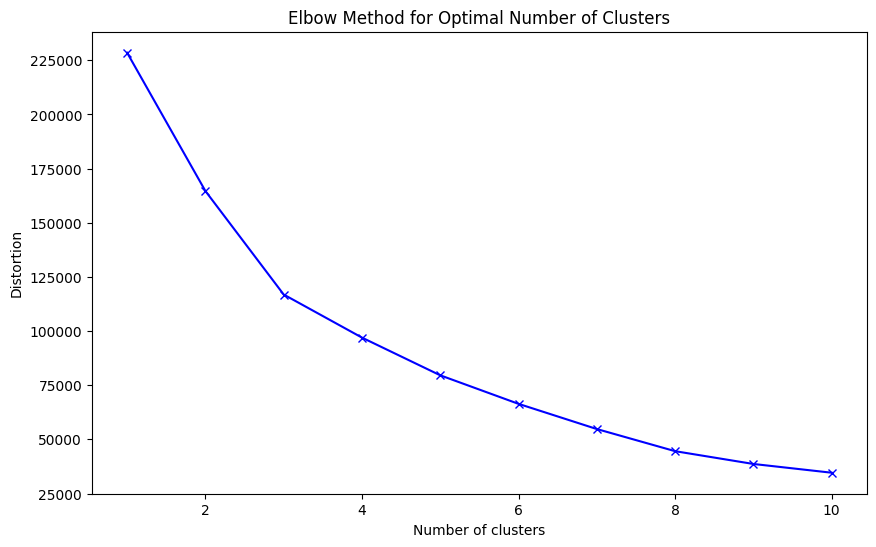

In [ ]:
# Using the Elbow method to find the optimal number of clusters
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df[['Lat', 'Lon']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
# Applying KMeans with the optimal number of clusters (let's assume it's 4 from the elbow method)
kmeans = KMeans(n_clusters=4, random_state=0)
df['location_cluster'] = kmeans.fit_predict(df[['Lat', 'Lon']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


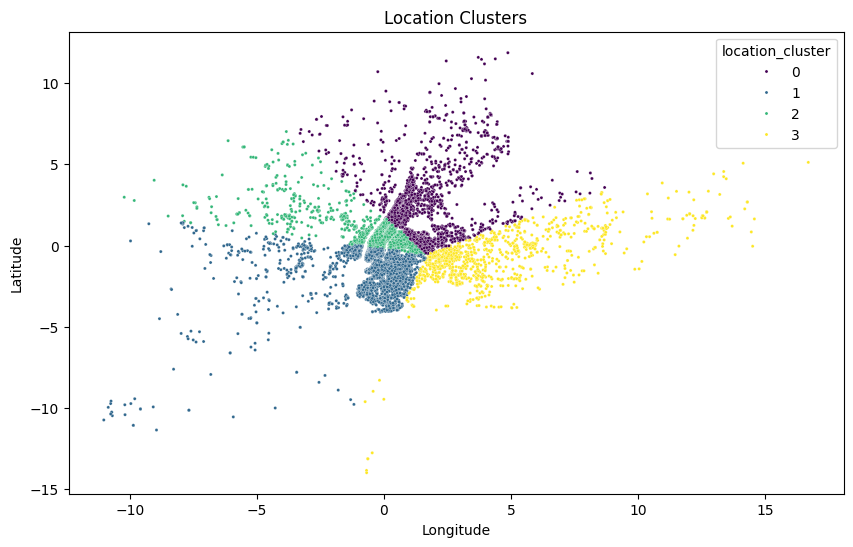

In [ ]:
# Visualize the clusters on a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lon', y='Lat', hue='location_cluster', palette='viridis', data=df, s=5)
plt.title('Location Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Save the modified dataframe to a new CSV
df.to_csv('uber_rides_analyzed.csv', index=False)